In [1]:
import torch
from torch_geometric.loader import DataLoader
from data_creation import create_dataset, to_pyg_data
from models.EdgeNet import paramNet
from torch.optim import Adam


c:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# run only if new data is desired
ode_dim = 2
n_data = 2
x_exact, x_train, y_train, param = create_dataset(ode_dim,n_data,1000)

dataset = []
for i in range(0,len(x_train)):
    p = param[i]
    param_tensor = torch.cat((p.Win.flatten(),p.Wout.flatten(),p.bin.flatten(),p.bout.flatten(),p.gamma.flatten()))

    param_tensor2 = torch.cat((p.Win.flatten(),p.Wout.flatten()))
    print(param_tensor2.max())
    dataset.append(to_pyg_data(x_train[i],param_tensor,ode_dim,n_data))

loader = DataLoader(dataset,batch_size=128,shuffle=True)

x_text_exact, x_test, y_test, param_test = create_dataset(ode_dim,n_data,128)

dataset = []
for i in range(0,len(x_test)):
    p = param_test[i]
    param_tensor = torch.cat((p.Win.flatten(),p.Wout.flatten(),p.bin.flatten(),p.bout.flatten(),p.gamma.flatten()))
    dataset.append(to_pyg_data(x_test[i],param_tensor,ode_dim,n_data))

test_loader = DataLoader(dataset,batch_size=128,shuffle=True)

tensor(4.3335)
tensor(1.8986)
tensor(2.7792)
tensor(3.4874)
tensor(4.6194)
tensor(2.7226)
tensor(5.3749)
tensor(3.1109)
tensor(2.3501)
tensor(5.0027)
tensor(2.3749)
tensor(2.9301)
tensor(3.6474)
tensor(4.4750)
tensor(2.5926)
tensor(3.1666)
tensor(2.3002)
tensor(3.1591)
tensor(2.7943)
tensor(3.4367)
tensor(2.5818)
tensor(6.4620)
tensor(3.7821)
tensor(3.1895)
tensor(2.2112)
tensor(5.3534)
tensor(3.8186)
tensor(31.2467)
tensor(8.3983)
tensor(3.0565)
tensor(3.2942)
tensor(2.6394)
tensor(1.8668)
tensor(3.4745)
tensor(2.2369)
tensor(5.5518)
tensor(5.1900)
tensor(3.1335)
tensor(2.9388)
tensor(3.3743)
tensor(2.2330)
tensor(2.5771)
tensor(5.1087)
tensor(2.9693)
tensor(2.6198)
tensor(1.3823)
tensor(1.4608)
tensor(4.1311)
tensor(2.7453)
tensor(2.7617)
tensor(2.7325)
tensor(2.2674)
tensor(3.1804)
tensor(3.5983)
tensor(3.3992)
tensor(2.2840)
tensor(2.7258)
tensor(2.1417)
tensor(2.3617)
tensor(2.1174)
tensor(4.4707)
tensor(2.9478)
tensor(3.6913)
tensor(5.5495)
tensor(4.6078)
tensor(3.1918)
tensor(2.

KeyboardInterrupt: 

In [15]:
model = paramNet(n_data, ode_dim, 1)
optimizer = Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()  # or MSELoss for regression
reg = torch.nn.L1Loss()

train_loss = []
test_loss = []

# initial test loss evaluation
with torch.no_grad():
    for data in test_loader:

        out = model(data)
        loss = criterion(out, data.y)

        test_loss.append(loss)

        print(loss.item())

# Training loop
for epoch in range(2000):
    model.train()

    tr_loss = 0
    for data in loader:
        optimizer.zero_grad()

        out = model(data)
        print(data.y.max())
        loss = criterion(out, data.y)

        train_loss.append(loss)

        loss.backward()
        optimizer.step()
        
        tr_loss += loss
    
    with torch.no_grad():
        for data in test_loader:

            out = model(data)
            loss = criterion(out, data.y)

            test_loss.append(loss)

            print(loss.item())

7.735710144042969
tensor(373.3125)
tensor(10.8129)
tensor(71.6823)
tensor(15.5782)
tensor(37.5829)
tensor(17.9517)
tensor(82.8700)
tensor(72.1113)
7.579213619232178
tensor(82.8700)
tensor(71.6823)
tensor(31.2467)
tensor(72.1113)
tensor(26.3703)
tensor(11.0570)
tensor(373.3125)
tensor(44.6592)
7.393650531768799
tensor(68.7271)
tensor(72.1113)
tensor(39.6284)
tensor(31.2467)
tensor(71.6823)
tensor(82.8700)
tensor(373.3125)
tensor(12.1305)
7.37408447265625
tensor(373.3125)
tensor(72.1113)
tensor(31.2467)
tensor(71.6823)
tensor(82.8700)
tensor(37.5829)
tensor(14.4302)
tensor(44.6592)
7.364503383636475
tensor(39.6284)
tensor(82.8700)
tensor(373.3125)
tensor(72.1113)
tensor(68.7271)
tensor(17.9498)
tensor(44.6592)
tensor(17.9477)
7.387972831726074
tensor(373.3125)
tensor(16.0835)
tensor(72.1113)
tensor(31.2467)
tensor(68.7271)
tensor(82.8700)
tensor(71.6823)
tensor(38.6422)
7.382923126220703
tensor(8.7303)
tensor(44.6592)
tensor(31.2467)
tensor(39.6284)
tensor(373.3125)
tensor(82.8700)
tenso

KeyboardInterrupt: 

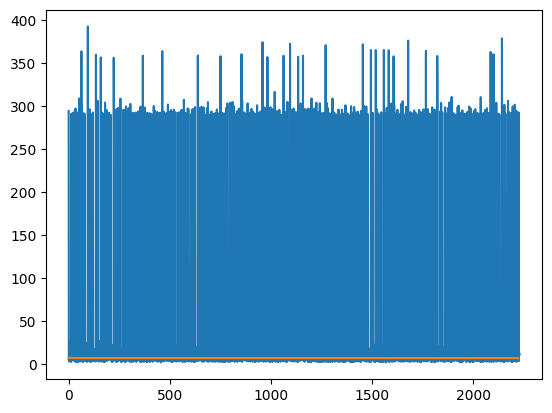

In [16]:
import matplotlib.pyplot as plt

def get_adjacency(W):
        values_log_W = torch.sort(torch.log(torch.abs(W.flatten())))[0]
        treshold = values_log_W[torch.sort(values_log_W[1:] - values_log_W[:-1])[1][-1] + 1]
        W_bool_activation = (W >= torch.exp(treshold)).double()
        W_bool_repr = (W <= -torch.exp(treshold)).double()
        A = W_bool_activation-W_bool_repr
        return A

tr_l = [train_loss[i].to('cpu').detach().numpy() for i in range(0,len(train_loss))]
tst_l = [test_loss[i].to('cpu').detach().numpy() for i in range(0,len(test_loss))]
plt.plot(range(0,len(tr_l)),tr_l)
plt.plot(range(0,len(loader)*len(tst_l),len(loader)),tst_l)
plt.show()